In [ ]:
!pip install kaggle
# from google.colab import files
# files.upload()

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# /content/kaggle.json

In [ ]:
# ! kaggle datasets list
from zipfile import ZipFile
! kaggle datasets download -d yasserh/housing-prices-dataset
with ZipFile('/content/housing-prices-dataset.zip', 'r') as zipObj:
  zipObj.extractall('/content/')

Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 7.40MB/s]


In [ ]:
!pip install ipympl
%matplotlib widget

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
import random
import re
# xtrain = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
# ytrain = np.array([250, 300, 480,  430, 630, 730,])
xtrain = df['bedrooms']
# .loc[100:200].reset_index(drop=True)
print(xtrain)

ytrain = df['bathrooms']
# .loc[100:200].reset_index(drop=True)
print(ytrain)

# print(type(ytrain))

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64
0      2
1      4
2      2
3      2
4      1
      ..
540    1
541    1
542    1
543    1
544    1
Name: bathrooms, Length: 545, dtype: int64


In [ ]:
xtrain.shape[0]
ytrain.shape[0]

545

In [ ]:
def linearRegression(x,y,w,b):
  m = x.shape[0]
  fwb = np.zeros(m)
  for i in range(m):
    # fwb(x) = wx + b
    fwb[i] = w * x[i] + b

  return fwb

In [ ]:
w = 3
b = -8

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

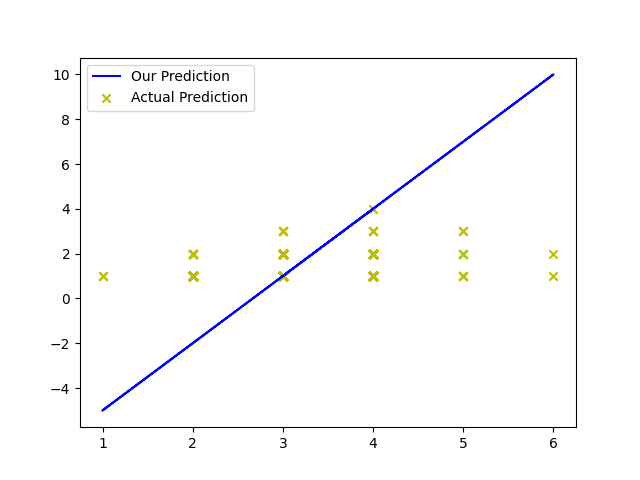

In [ ]:
plt.close('all')
tmp_fwb = linearRegression(xtrain, ytrain, w, b)

plt.plot(xtrain, tmp_fwb, c='b', label='Our Prediction')
plt.scatter(xtrain, ytrain, marker='x', c='y', label='Actual Prediction')

plt.legend()
plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
def TotalCost(x,y,w,b):
  cost_sum = 0
  m = x.shape[0]
  for i in range(m):
    fwb = w * x[i] + b
    cost = (fwb - y[i]) ** 2
    cost_sum = cost_sum + cost

  total_cost = (1/(2*m)) * cost_sum
  return total_cost

# def CostLine(x,y,w,b)

In [ ]:
w_range = np.array([200-300, 200+300])
b_range = np.array([50-300, 50+300])
# print(w_range)
# print(b_range)

w_space = np.linspace(*w_range, 100)
b_space = np.linspace(*b_range, 100)
# print(w_space)
# print(b_space)

In [ ]:
tmp_w, tmp_b = np.meshgrid(w_space, b_space)
# print(tmp_w, tmp_b)
# print(tmp_w.shape[1])

z = np.zeros_like(tmp_b)
print(z)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
for i in range(tmp_w.shape[0]):
  for j in range(tmp_w.shape[1]):
    z[i,j] = TotalCost(xtrain, ytrain, tmp_w[i][j], tmp_b[i][j])
    if z[i,j] == 0 : z[i,j] = 1e-6

# print(z)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

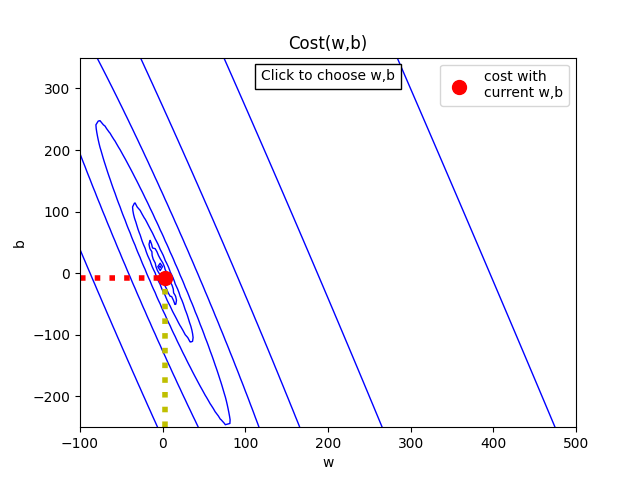

In [ ]:
plt.close('all')
fig,ax = plt.subplots()
ax.contour(tmp_w, tmp_b, np.log(z), levels=12, linewidths=1, colors='b')
ax.set_title('Cost(w,b)')
ax.set_xlabel('w', fontsize=10)
ax.set_ylabel('b', fontsize=10)
ax.set_xlim(w_range) ; ax.set_ylim(b_range)
cscat  = ax.scatter(w,b, s=100, color='r', zorder= 10, label="cost with \ncurrent w,b")
chline = ax.hlines(b, ax.get_xlim()[0],w, lw=4, color='r', ls='dotted')
cvline = ax.vlines(w, ax.get_ylim()[0],b, lw=4, color='y', ls='dotted')
ax.text(0.5,0.95,"Click to choose w,b",  bbox=dict(facecolor='white', ec = 'black'), fontsize = 10,
                transform=ax.transAxes, verticalalignment = 'center', horizontalalignment= 'center')

plt.legend()
plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()